In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/tv_shows_data.csv")
df.head()

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
0,Stranger Things,Science Fiction Horror,"July 15, 2016",3,25
1,The Crown,Historical Drama,"November 4, 2016",4,40
2,Ozark,Crime Drama,"July 21, 2017",3,30
3,Lost in Space,Science Fiction,"April 13, 2018",2,20
4,Narcos: Mexico,Crime Drama,"November 16, 2018",2,20


In [3]:
df[df["Title"] == "Title"]

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
208,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
491,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes


# Análise Descritiva

In [4]:
len(df)

641

In [5]:
df["Genre"].nunique()

171

In [6]:
df["Genre"].unique()

array(['Science Fiction Horror', 'Historical Drama', 'Crime Drama',
       'Science Fiction', 'Superhero Action', 'Zombie Drama',
       'Science Fiction Drama', 'Police Procedural Anthology Series',
       'Superhero Science Fiction Drama', 'Romantic Drama',
       'Fantasy Drama', 'Horror Teen Drama', 'Fantasy',
       'Coming Of Age Drama', 'Romance Drama', 'Teen Drama',
       'Anthology Series', 'Detective Drama', 'Drama', 'Horror',
       'Romance', 'Biopic', 'Teen Drama Fantasy', 'Comedy Drama',
       'Comedy', 'Satire Drama', 'Coming Of Age Comedy', 'Sketch Comedy',
       'Dark Comedy', 'Black Comedy Drama', 'Sitcom', 'Dramedy',
       'Musical Comedy', 'Medieval Fantasy Comedy', 'Anthology',
       'Mockumentary', 'Science Fantasy Dark Comedy', 'War Drama',
       'Dark Fantasy', 'Suspense', 'Workplace Comedy',
       "Children'S Series", 'Disaster', 'Dark Fantasy Adventure',
       'Fantasy Action', 'Romantic Comedy', 'Supernatural Drama',
       'Thriller', 'Police Procedu

In [7]:
df["Genre"].value_counts()

Docu Series                    78
Comedy                         60
Drama                          35
Comedy Drama                   30
Crime Drama                    25
                               ..
Suspense                        1
Zombie Horror                   1
Teen Sitcom Fantasy             1
Science Fiction Comedy          1
Science Fantasy Dark Comedy     1
Name: Genre, Length: 171, dtype: int64

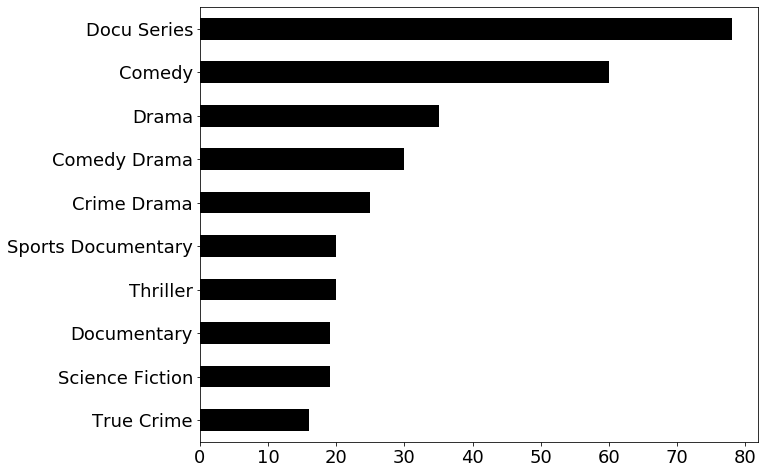

In [8]:
# top 10 genres' movies
df["Genre"].value_counts()[:10].plot(kind = "barh",figsize = (10, 8),
                                     fontsize = 18, color = "black").invert_yaxis()

## *Recommender Systems* are widely used to filter entertainment data. There are two types: *content-based* e *collaborative filtering*.

### based on a TV show previously watched, what TV shows should be recommended to a netflix user?

In [9]:
    # to compute features similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
    # to extract features
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# creating a vector with TV shows' titles

vectorizer = TfidfVectorizer(stop_words = "english") # convert a collection of raw documents
                                                     # to a matrix of TF-IDF features

df["Title"] = df["Title"].fillna("") # removing NaN

count_series_matrix = vectorizer.fit_transform(df["Title"]) # fit_transform() is used on the training data
                                                            # so that we can scale the training data and also
                                                            # learn the scaling parameters of that data
        
                                                            # I need to extract some kind of
                                                            # features from TV shows' title

In [11]:
count_series_matrix.shape

(641, 1014)

In [12]:
vectorizer.get_feature_names()[:10]

['101', '13', '1983', '1989', '1994', '2020', '2806', '3000', '72', '7seeds']

### from the shape of the the matrix token I can conclude that 1106 different vocabularies/words in the dataset class "title".

In [13]:
cosine_sim = linear_kernel(count_series_matrix, count_series_matrix) # dot product between vectors

In [14]:
cosine_sim.shape

(641, 641)

In [15]:
cosine_sim[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### a 641x641 matrix because each TV show cosine similarity score with every other TV show cosine similarity.

In [16]:
indices = pd.Series(df.index, index = df["Title"]).drop_duplicates()
indices[:10]

Title
Stranger Things         0
The Crown               1
Ozark                   2
Lost in Space           3
Narcos: Mexico          4
The Umbrella Academy    5
Black Summer            6
Another Life            7
Criminal: UK            8
Raising Dion            9
dtype: int64

In [17]:
# creating a simple recommender system function

def recommender(title, cosine_sim = cosine_sim): # title stands for the title of the previously watched TV show
    title_idx = indices[title] # index of the TV show previously watched
    
    sim_scores = list(enumerate(cosine_sim[title_idx])) # similarity score of all TV shows with the
                                                        # TV show previoulsy watched
        
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True) # reverse to get the top matched scores
    sim_scores = sim_scores[1:11] # top 10: notice we don't take the first one
                                  # because it's the same movie (cosine_sim = 1)
    
    shows_indices = [idx[0] for idx in sim_scores] # recommended TV shows' indices
    
    return df["Title"].iloc[shows_indices]

### I just finished *The Witcher*, so what TV show should I watch next?

In [18]:
recommender("The Witcher")

180    The Witcher: A Look Inside the Episodes
0                              Stranger Things
1                                    The Crown
2                                        Ozark
3                                Lost in Space
4                               Narcos: Mexico
5                         The Umbrella Academy
6                                 Black Summer
7                                 Another Life
8                                 Criminal: UK
Name: Title, dtype: object

In [19]:
all_recommendations = recommender("The Witcher")

# top recommendations to users who just finished The Witcher
df_recommendations = df[df["Title"].isin(all_recommendations)]
df_recommendations

,Title,Genre,Premiere,No_of_Seasons,No_of_Episodes
0,Stranger Things,Science Fiction Horror,"July 15, 2016",3,25
1,The Crown,Historical Drama,"November 4, 2016",4,40
2,Ozark,Crime Drama,"July 21, 2017",3,30
3,Lost in Space,Science Fiction,"April 13, 2018",2,20
4,Narcos: Mexico,Crime Drama,"November 16, 2018",2,20
5,The Umbrella Academy,Superhero Action,"February 15, 2019",2,20
6,Black Summer,Zombie Drama,"April 11, 2019",1,8
7,Another Life,Science Fiction Drama,"July 25, 2019",1,10
8,Criminal: UK,Police Procedural Anthology Series,"September 20, 2019",2,7
180,The Witcher: A Look Inside the Episodes,Making Of,"September 2, 2020",1,8
